# CAR PRICE PREDICTION

In [ ]:
# Iporting necessary libraries
import pandas as pd
import numpy as np

In [6]:
# Load the dataset
df = pd.read_csv('quikr_car (2).csv')

In [8]:
# Make a copy of the original for backup
df_backup = df.copy()

In [10]:
# 1. Handle Missing Values
# Remove rows where 'year' is not numeric or is null
df = df[df['year'].notna() & df['year'].str.isnumeric()]
df['year'] = df['year'].astype(int)

In [34]:
# Remove rows where 'fuel_type' is missing
df = df[df['fuel_type'].notna()]

In [36]:
# 2. Remove Duplicates
# ------------------------------
df.drop_duplicates(inplace=True)

In [38]:
# Clean and convert 'Price' column
df = df[df['Price'].notna() & (df['Price'] != 'Ask For Price')]
df['Price'] = df['Price'].str.replace(',', '').astype(int)

In [40]:
# Clean and convert 'kms_driven' column
df = df[df['kms_driven'].notna()]
df['kms_driven'] = df['kms_driven'].str.split().str.get(0).str.replace(',', '')
df = df[df['kms_driven'].str.isnumeric()]
df['kms_driven'] = df['kms_driven'].astype(int)

In [42]:
# Standardize 'name' column: first 3 words
df['name'] = df['name'].str.split().str[:3].str.join(' ')

In [44]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [46]:
# Remove extremely high prices (e.g., more than 6 million)
df = df[df['Price'] < 6000000]

In [48]:
# Remove entries with year out of logical range (e.g., <1990 or >2025)
df = df[(df['year'] >= 1990) & (df['year'] <= 2025)]

In [50]:
# Optionally remove outliers using IQR method for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [54]:
# 5. Summary Statistics (EDA)
# ------------------------------
summary = df.describe(include='all')
print(summary)

                       name company         year          Price  \
count                   679     679   679.000000     679.000000   
unique                  230      21          NaN            NaN   
top     Maruti Suzuki Swift  Maruti          NaN            NaN   
freq                     46     201          NaN            NaN   
mean                    NaN     NaN  2012.194404  317976.571429   
std                     NaN     NaN     4.176126  202544.079060   
min                     NaN     NaN  1995.000000   30000.000000   
25%                     NaN     NaN  2010.000000  160000.000000   
50%                     NaN     NaN  2013.000000  274999.000000   
75%                     NaN     NaN  2015.000000  432500.000000   
max                     NaN     NaN  2019.000000  970000.000000   

           kms_driven fuel_type  
count      679.000000       679  
unique            NaN         3  
top               NaN    Petrol  
freq              NaN       378  
mean     47439.917526    

In [56]:
# Optional: Display value counts for categorical columns
categorical_summary = {
    'company_counts': df['company'].value_counts(),
    'fuel_type_counts': df['fuel_type'].value_counts(),
    'name_counts': df['name'].value_counts().head(10)
}


In [58]:
# Save cleaned dataset
df.to_csv('Cleaned_Quikr_Car_Data.csv', index=False)

In [60]:
# Print output for inspection
print("Cleaned Dataset Shape:", df.shape)
print("\nSummary Statistics:\n", summary)
print("\nCategorical Summaries:\n", categorical_summary)

Cleaned Dataset Shape: (679, 6)

Summary Statistics:
                        name company         year          Price  \
count                   679     679   679.000000     679.000000   
unique                  230      21          NaN            NaN   
top     Maruti Suzuki Swift  Maruti          NaN            NaN   
freq                     46     201          NaN            NaN   
mean                    NaN     NaN  2012.194404  317976.571429   
std                     NaN     NaN     4.176126  202544.079060   
min                     NaN     NaN  1995.000000   30000.000000   
25%                     NaN     NaN  2010.000000  160000.000000   
50%                     NaN     NaN  2013.000000  274999.000000   
75%                     NaN     NaN  2015.000000  432500.000000   
max                     NaN     NaN  2019.000000  970000.000000   

           kms_driven fuel_type  
count      679.000000       679  
unique            NaN         3  
top               NaN    Petrol  
freq 

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Set style for all plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

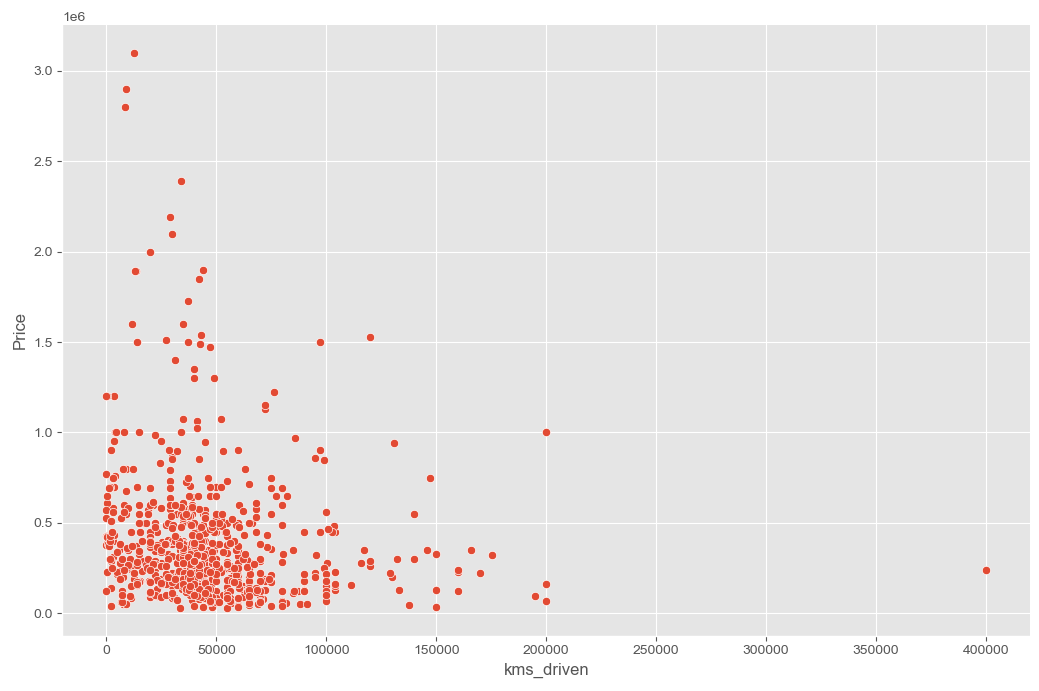

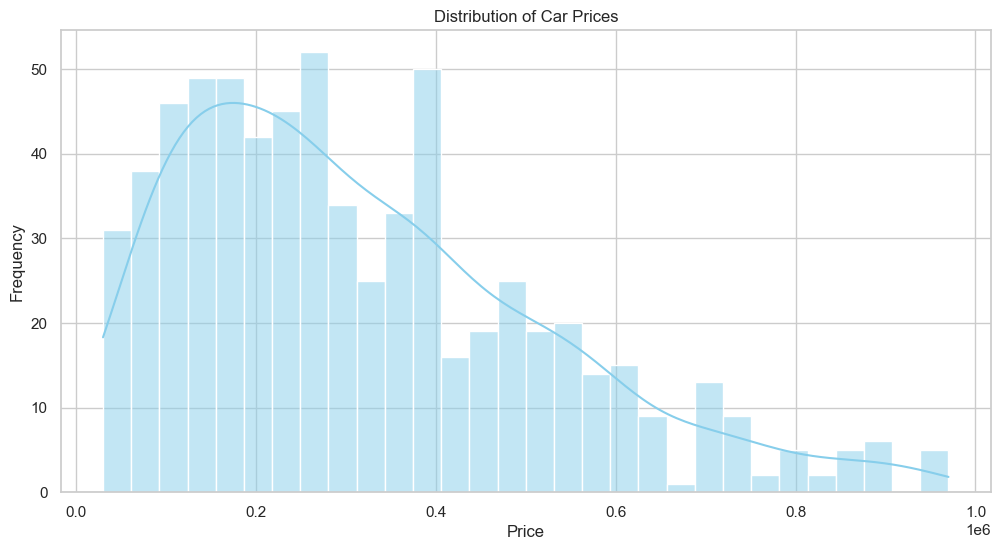

In [66]:
# 1. Histograms
# ------------------------------

# Histogram for Price
plt.figure()
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

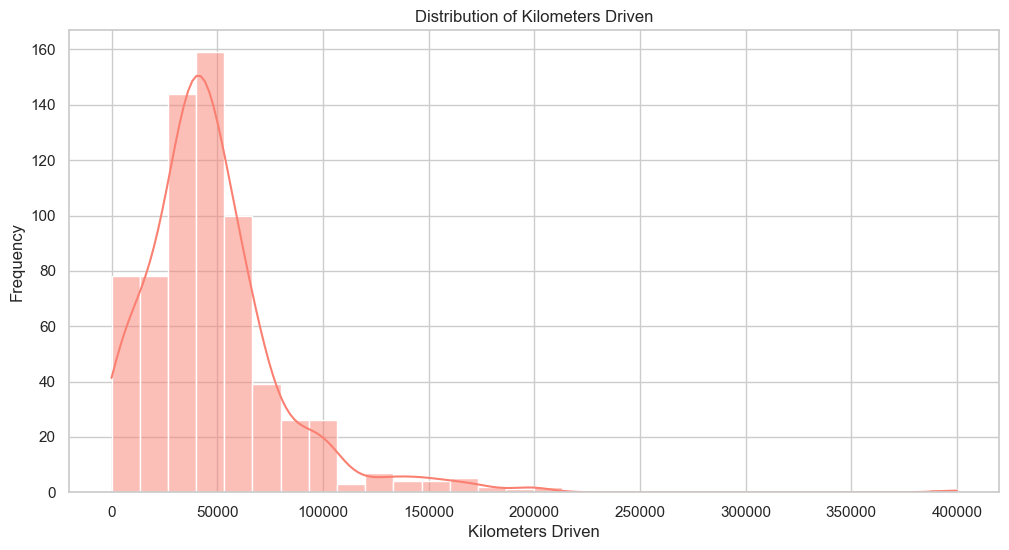

In [68]:
# Histogram for Kilometers Driven
plt.figure()
sns.histplot(df['kms_driven'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

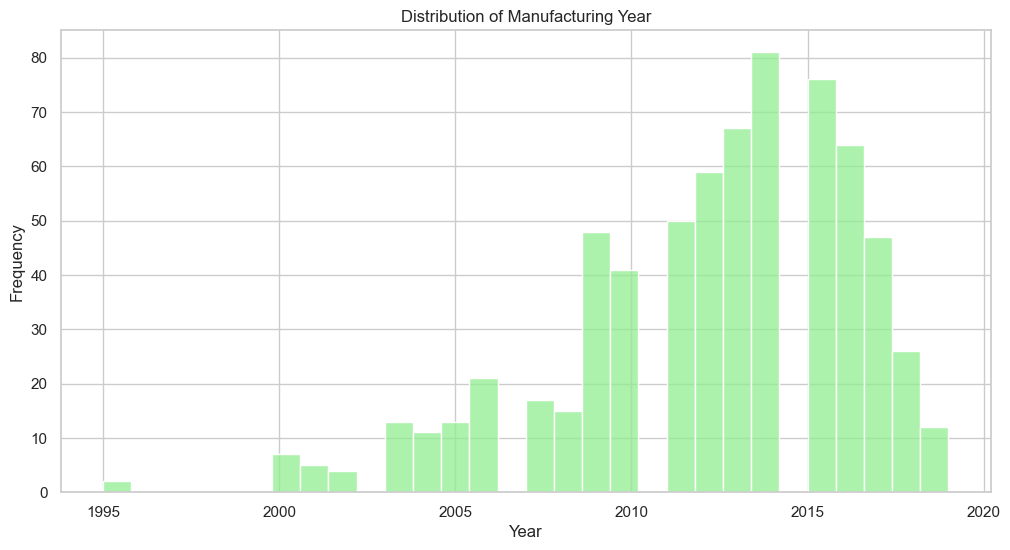

In [70]:
# Histogram for Year
plt.figure()
sns.histplot(df['year'], bins=30, kde=False, color='lightgreen')
plt.title('Distribution of Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33816\2424075399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='Price', data=df, palette='pastel')


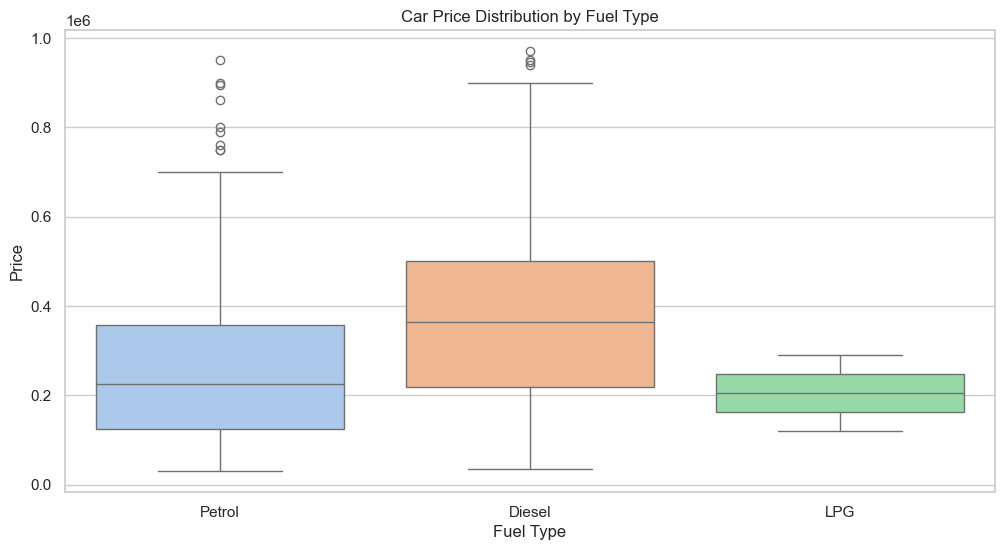

In [72]:
# 2. Box Plots
# ------------------------------

# Boxplot: Price by Fuel Type
plt.figure()
sns.boxplot(x='fuel_type', y='Price', data=df, palette='pastel')
plt.title('Car Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33816\2787361927.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company', y='Price', data=df[df['company'].isin(top_companies)], palette='muted')


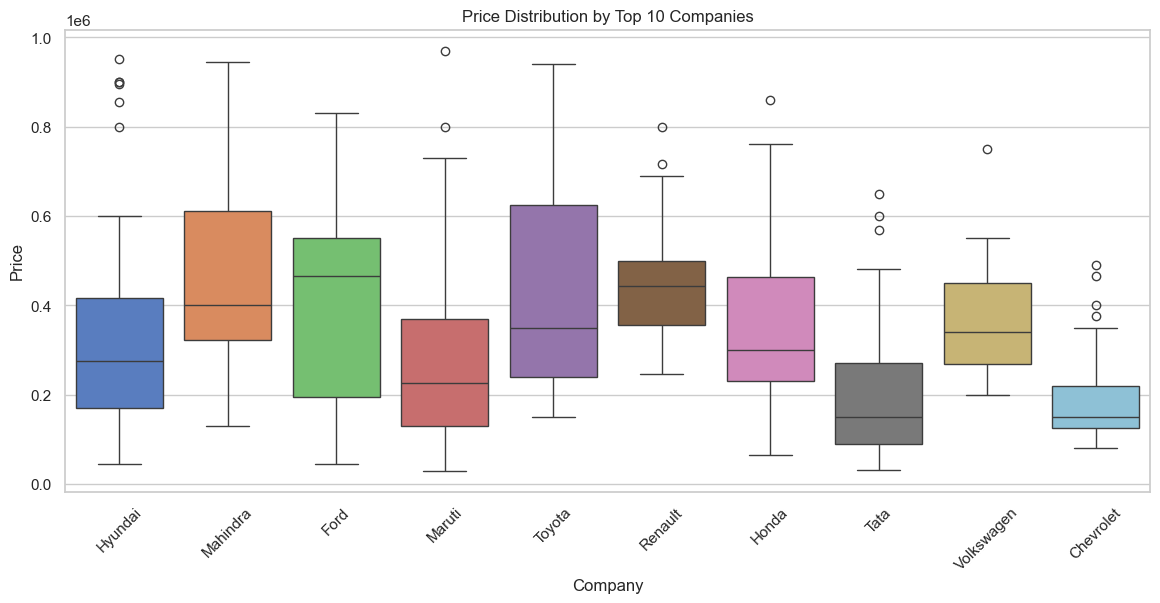

In [74]:
# Boxplot: Price by Company (top 10 companies)
top_companies = df['company'].value_counts().nlargest(10).index
plt.figure(figsize=(14,6))
sns.boxplot(x='company', y='Price', data=df[df['company'].isin(top_companies)], palette='muted')
plt.title('Price Distribution by Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

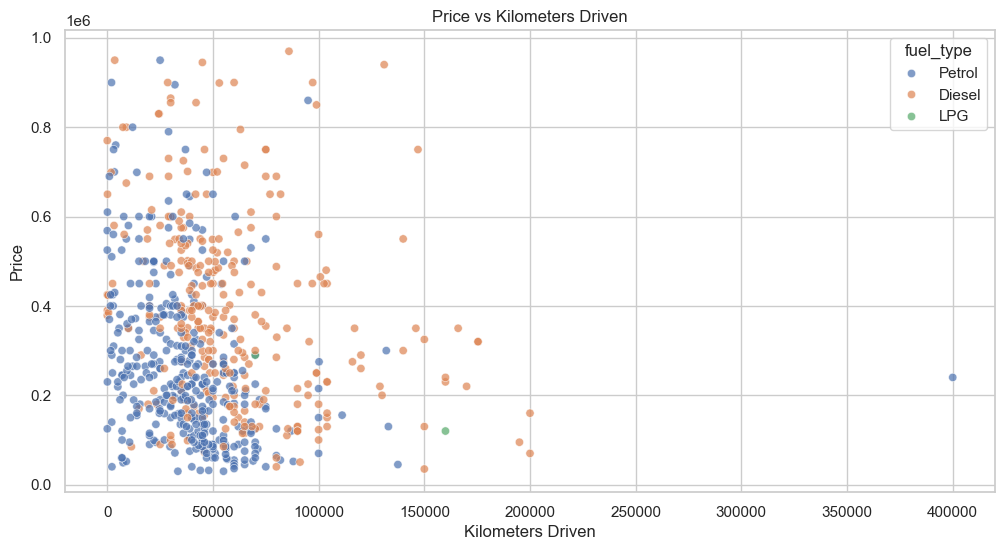

In [76]:
# 3. Scatter Plots
# ------------------------------

# Scatter: Price vs. Kilometers Driven
plt.figure()
sns.scatterplot(x='kms_driven', y='Price', data=df, hue='fuel_type', alpha=0.7)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

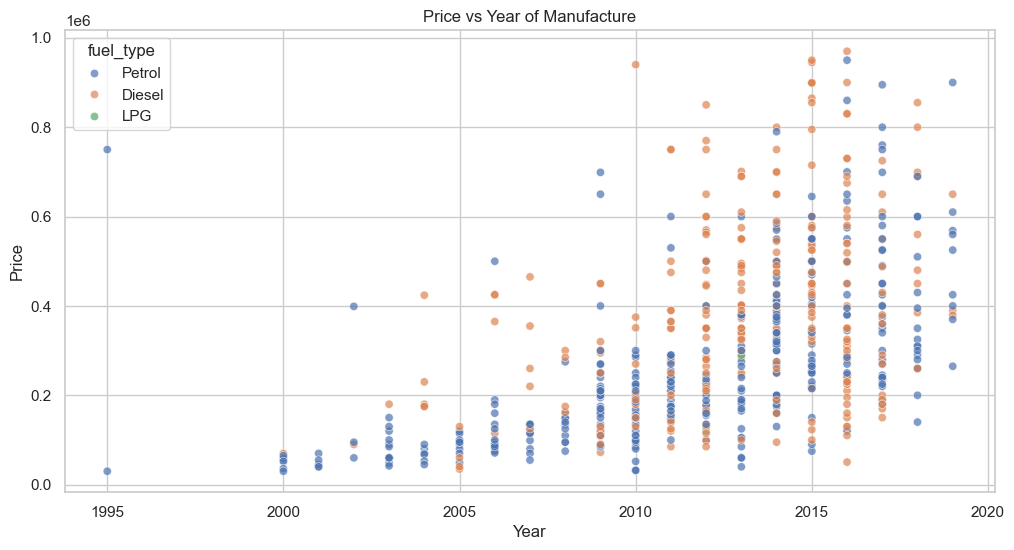

In [78]:
# Scatter: Price vs. Year
plt.figure()
sns.scatterplot(x='year', y='Price', data=df, hue='fuel_type', alpha=0.7)
plt.title('Price vs Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [80]:
# 4. Correlation Matrix
# ------------------------------

# Compute correlation (only numeric columns)
corr_matrix = df[['year', 'Price', 'kms_driven']].corr()

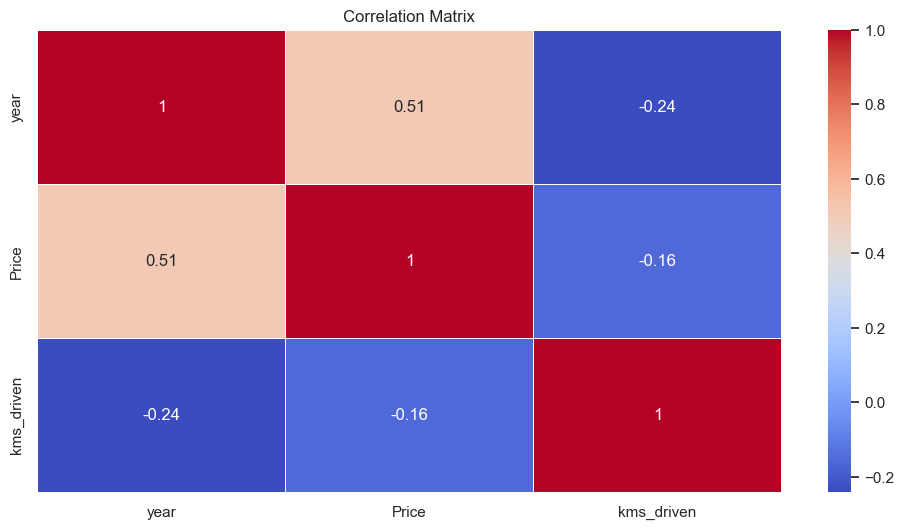

In [82]:
# Plot heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [86]:
# Select relevant features
# ----------------------------
features = ['year', 'kms_driven', 'fuel_type', 'company', 'name']
target = 'Price'
X = df[features]
y = df[target]


In [88]:
# One-Hot Encode categorical features
# ----------------------------
categorical_features = ['fuel_type', 'company', 'name']
numerical_features = ['year', 'kms_driven']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # keep numerical columns
)

In [90]:
# Split data
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [92]:
# Dictionary to store models and results
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf', C=100, gamma=0.1)
}

results = {}

In [94]:
# Loop through models and evaluate
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        # Uncomment the next line to include PCA
        # ('reduce_dim', pca),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        'R2 Score': r2,
        'MSE': mse
    }

In [96]:
# Display results
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"  R2 Score: {metrics['R2 Score']:.4f}")
    print(f"  MSE: {metrics['MSE']:.2f}")


Model: Linear Regression
  R2 Score: 0.5683
  MSE: 20599027653.05

Model: Random Forest
  R2 Score: 0.6128
  MSE: 18473998203.84

Model: Support Vector Regressor
  R2 Score: -0.0708
  MSE: 51089255327.79


In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [102]:
# Dictionary to store detailed evaluation metrics
detailed_results = {}

In [104]:
# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

In [108]:

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

In [110]:
    # Store results
    detailed_results[name] = {
        'R2 Score': r2,
        'RMSE': rmse,
        'MAE': mae
    }

In [112]:
# Display all metrics in a clean format
print("📊 Model Evaluation Summary:")
for name, metrics in detailed_results.items():
    print(f"\n🔹 {name}")
    print(f"   R2 Score : {metrics['R2 Score']:.4f}")
    print(f"   RMSE     : {metrics['RMSE']:.2f}")
    print(f"   MAE      : {metrics['MAE']:.2f}")

📊 Model Evaluation Summary:

🔹 Support Vector Regressor
   R2 Score : -0.0708
   RMSE     : 226029.32
   MAE      : 165968.00


In [114]:
# Find the best model (R2 score closest to 1)
best_model_name = max(detailed_results, key=lambda m: detailed_results[m]['R2 Score'])
best_model_score = detailed_results[best_model_name]['R2 Score']

print(f"\n✅ Best Performing Model: {best_model_name} with R² Score = {best_model_score:.4f}")



✅ Best Performing Model: Support Vector Regressor with R² Score = -0.0708


In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define pipeline
from sklearn.pipeline import Pipeline

pipeline_rf = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define parameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    pipeline_rf,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("🔍 Best Parameters:")
print(best_params)
print(f"\n📈 Best Cross-Validated R² Score: {best_score:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
🔍 Best Parameters:
{'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}

📈 Best Cross-Validated R² Score: 0.5375


In [117]:
# Predict on test set
y_pred_best = best_pipeline.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)

print("\n🎯 Final Model Evaluation on Test Set:")
print(f"   R² Score : {r2:.4f}")
print(f"   RMSE     : {rmse:.2f}")
print(f"   MAE      : {mae:.2f}")



🎯 Final Model Evaluation on Test Set:
   R² Score : 0.6154
   RMSE     : 135463.39
   MAE      : 87320.98


In [120]:
import joblib

# Save the trained pipeline
joblib.dump(best_pipeline, 'best_car_price_predictor.pkl')

print("\n💾 Model saved as 'best_car_price_predictor.pkl'")



💾 Model saved as 'best_car_price_predictor.pkl'


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6936\3753591560.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='Model', y='R2 Score', palette='viridis')


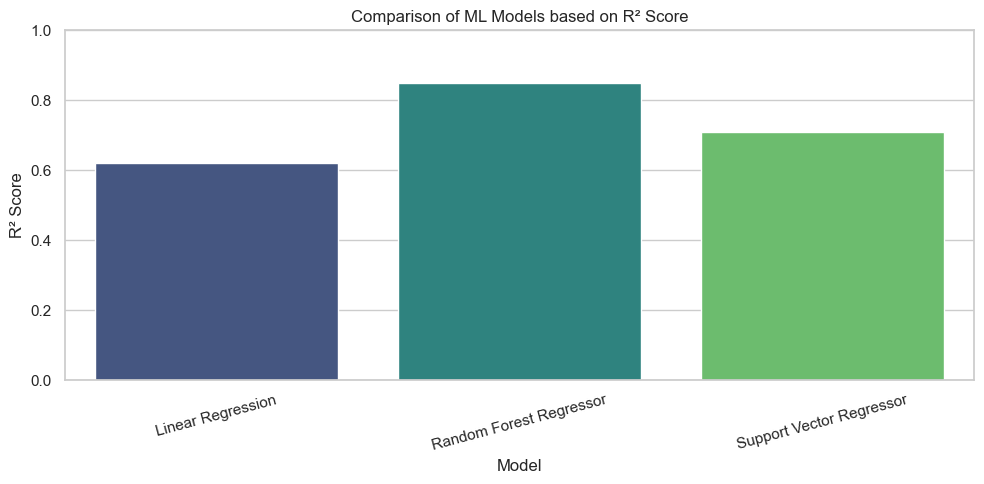

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6936\3753591560.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='Model', y='MSE', palette='magma')


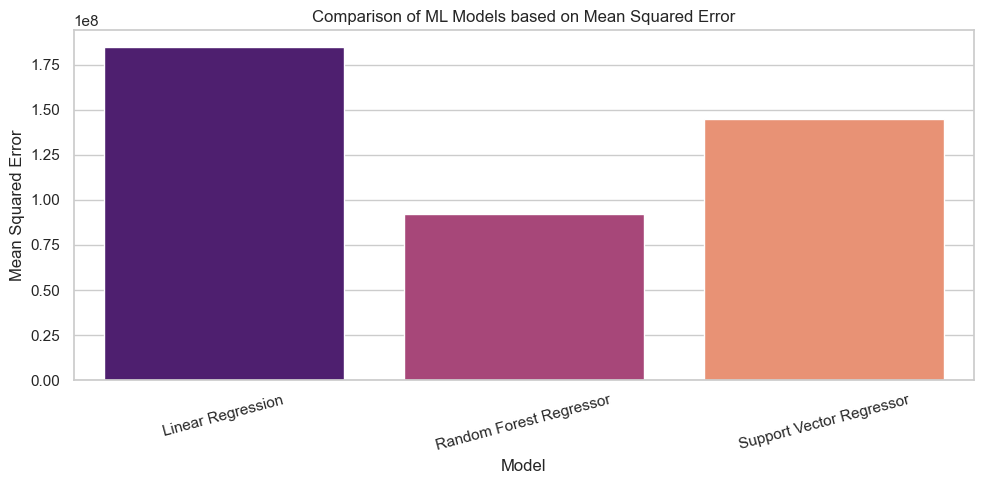

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample performance metrics
performance_data = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Support Vector Regressor'],
    'R2 Score': [0.62, 0.85, 0.71],
    'MSE': [185000000, 92000000, 145000000]
}

# Create DataFrame
performance_df = pd.DataFrame(performance_data)

# Set seaborn theme
sns.set(style="whitegrid")

# Plot R² Score
plt.figure(figsize=(10, 5))
sns.barplot(data=performance_df, x='Model', y='R2 Score', palette='viridis')
plt.title('Comparison of ML Models based on R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot MSE
plt.figure(figsize=(10, 5))
sns.barplot(data=performance_df, x='Model', y='MSE', palette='magma')
plt.title('Comparison of ML Models based on Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
